离散：<br>
朴素：特征之间是**有条件独立**的。$P(X_1|X_2,Y=1)=P(X_1|Y=1)$，用于求解分子。<br>
**全概率公式**可用于求解分母。二分类情况下将**两个分子相加**也可用于求解分母。<br>
朴素贝叶斯是一个**不建模**的算法。<br>
连续：<br>
求解连续型变量下某个点取值的概率问题，转化成求解一个函数$f(x)$在点$x_i$上的取值的问题。在现实中，往往假设$f(x)$满足某种统计学分布，最常见的是高斯分布，常用的还有伯努利分布、多项式分布等，fit就是估计对应分布的参数，predict就是在该参数下的分布中去进行概率预测。

## 一、高斯朴素贝叶斯

### （一）认识高斯朴素贝叶斯

`sklearn.naive_bayes.GaussianNB`(priors=None,var_smoothing=1e-09)

假设$P(x_i|Y)$服从**高斯分布**，来估计每个特征下每个类别上的条件概率。在实例化的时候，通常不需要对高斯朴素贝叶斯类输入任何参数，是非常**轻量级**的类，但过于简单也意味着贝叶斯没有太多的参数可以调整，因此贝叶斯算法的成长空间并不是太大。如果贝叶斯算法的效果不是太理想，一般考虑**换模型**。

#### 1.导入需要的库和数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB #高斯朴素贝叶斯
from sklearn.datasets import load_digits #手写数据集
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as CM #混淆矩阵

In [2]:
digits = load_digits()
X, y = digits.data, digits.target
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [3]:
Xtrain.shape #1257个数据，64个特征

(1257, 64)

In [4]:
Xtest.shape #540个数据

(540, 64)

In [5]:
np.unique(Ytrain) #多分类问题，类别是10个

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### 2.建模，探索数据集

In [6]:
gnb = GaussianNB().fit(Xtrain,Ytrain) #实例化+训练模型

In [7]:
acc_score = gnb.score(Xtest,Ytest) #接口score：预测精确性
acc_score

0.8592592592592593

In [8]:
Y_pred = gnb.predict(Xtest) #接口predict：查看预测结果
Y_pred

array([6, 1, 3, 0, 4, 5, 0, 8, 3, 8, 6, 8, 7, 8, 8, 8, 5, 9, 5, 6, 5, 4,
       7, 4, 8, 2, 7, 2, 8, 9, 2, 8, 3, 6, 0, 3, 8, 8, 1, 5, 2, 8, 8, 9,
       2, 2, 0, 7, 3, 6, 7, 2, 8, 0, 5, 4, 1, 9, 4, 0, 5, 8, 9, 1, 7, 8,
       7, 5, 8, 2, 4, 4, 8, 2, 6, 1, 2, 1, 7, 8, 8, 5, 9, 4, 3, 6, 9, 7,
       4, 2, 4, 8, 0, 5, 7, 7, 7, 4, 7, 8, 8, 7, 0, 7, 2, 1, 9, 9, 8, 7,
       1, 5, 1, 8, 0, 4, 8, 9, 5, 6, 4, 8, 3, 8, 0, 6, 8, 6, 7, 6, 1, 8,
       5, 0, 8, 2, 1, 8, 8, 6, 6, 0, 2, 4, 7, 8, 9, 5, 9, 4, 7, 8, 8, 6,
       7, 0, 8, 4, 7, 2, 2, 6, 4, 4, 1, 0, 3, 4, 3, 8, 7, 0, 6, 9, 7, 5,
       5, 3, 6, 1, 6, 6, 2, 3, 8, 2, 7, 3, 1, 1, 6, 8, 8, 8, 7, 7, 2, 5,
       0, 0, 8, 6, 6, 7, 6, 0, 7, 5, 5, 8, 4, 6, 5, 1, 5, 1, 9, 6, 8, 8,
       8, 2, 4, 8, 6, 5, 9, 9, 3, 1, 9, 1, 3, 3, 5, 5, 7, 7, 4, 0, 9, 0,
       9, 9, 6, 4, 3, 4, 8, 1, 0, 2, 9, 7, 6, 8, 8, 0, 6, 0, 1, 7, 1, 9,
       5, 4, 6, 8, 1, 5, 7, 7, 5, 1, 0, 0, 9, 3, 9, 1, 6, 3, 7, 2, 7, 1,
       9, 9, 8, 3, 3, 5, 7, 7, 7, 3, 9, 5, 0, 7, 5,

In [9]:
prob = gnb.predict_proba(Xtest) #接口predict_proba：查看预测的概率结果
prob

array([[0.00000000e+000, 4.69391744e-052, 1.74871280e-098, ...,
        0.00000000e+000, 4.19588993e-033, 1.51751459e-119],
       [0.00000000e+000, 1.00000000e+000, 9.26742456e-013, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 3.73608152e-026, ...,
        0.00000000e+000, 1.29541754e-039, 5.54684869e-077],
       ...,
       [0.00000000e+000, 2.43314963e-047, 4.82483668e-305, ...,
        2.31612692e-008, 1.23891596e-126, 2.87896140e-257],
       [0.00000000e+000, 8.26462929e-129, 4.99150558e-012, ...,
        0.00000000e+000, 4.01802372e-003, 6.19000712e-013],
       [0.00000000e+000, 9.99929965e-001, 1.45462767e-013, ...,
        5.05856094e-005, 1.94498169e-005, 3.42317317e-042]])

In [10]:
prob.shape #每一列对应一个标签下的概率

(540, 10)

In [11]:
prob.sum(axis=1) #每一行的和都是1，共540个1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

#### 3.使用混淆矩阵查看贝叶斯的分类结果

In [12]:
CM(Ytest,Y_pred)

array([[47,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 46,  2,  0,  0,  0,  0,  3,  6,  2],
       [ 0,  2, 35,  0,  0,  0,  1,  0, 16,  0],
       [ 0,  0,  1, 40,  0,  1,  0,  3,  4,  0],
       [ 0,  0,  1,  0, 39,  0,  1,  4,  0,  0],
       [ 0,  0,  0,  2,  0, 58,  1,  1,  1,  0],
       [ 0,  0,  1,  0,  0,  1, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  2, 55,  0],
       [ 1,  1,  0,  1,  2,  0,  0,  3,  7, 41]], dtype=int64)

ROC曲线不能用于多分类。多分类状况下最佳的模型评估指标是**混淆矩阵**和**整体的准确度**。

### （二）探索贝叶斯：高斯朴素贝叶斯擅长的数据集

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification #月亮型、环形、二分型
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB

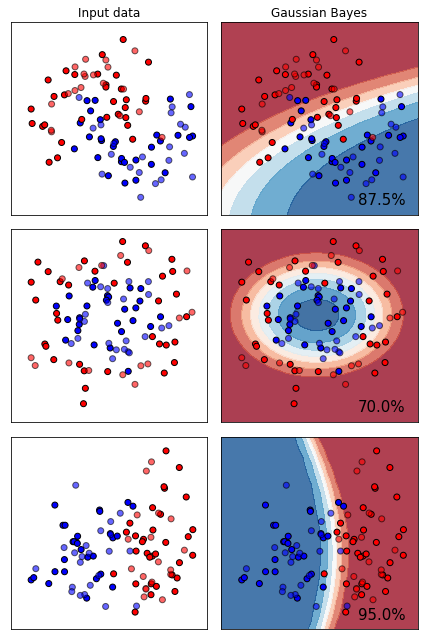

In [14]:
h = .02
names = ["Multinomial","Gaussian","Bernoulli","Complement"]
classifiers = [MultinomialNB(),GaussianNB(),BernoulliNB(),ComplementNB()]
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
datasets = [make_moons(noise=0.3, random_state=0), make_circles(noise=0.2, factor=0.5, random_state=1), linearly_separable]

figure = plt.figure(figsize=(6, 9))
i = 1

for ds_index, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    array1,array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2), np.arange(x2_min, x2_max, 0.2))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), 2, i)
    if ds_index == 0:
        ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,edgecolors='k')
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    ax = plt.subplot(len(datasets),2,i)
    clf = GaussianNB().fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    Z = clf.predict_proba(np.c_[array1.ravel(),array2.ravel()])[:, 1]
    Z = Z.reshape(array1.shape)
    ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
    
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    if ds_index == 0:
        ax.set_title("Gaussian Bayes")
    
    ax.text(array1.max() - .3, array2.min() + .3, ('{:.1f}%'.format(score*100)), size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

从图上来看，高斯贝叶斯属于比较特殊的一类分类器，其分类效果在**二分数据**和**月亮型数据**上表现优秀，但是**环形数据**不太擅长。之前的模型中，许多线性模型比如逻辑回归，线性SVM等等，在线性数据集上会绘制直线决策边界，因此难以对月亮型和环形数据进行区分，但高斯朴素贝叶斯的决策边界是**曲线**，可以是**环形**也可以是**弧线**，所以尽管贝叶斯本身更加擅长线性可分的二分数据，但朴素贝叶斯在环形数据和月亮型数据上也可以有远远胜过其他线性模型的表现。

### （三）探索贝叶斯：高斯朴素贝叶斯的拟合效果与运算速度

#### 1.导入需要的模块和库

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from time import time
from sklearn.naive_bayes import GaussianNB #高斯朴素贝叶斯
from sklearn.svm import SVC #支持向量机
from sklearn.ensemble import RandomForestClassifier as RFC #随机森林
from sklearn.tree import DecisionTreeClassifier as DTC #决策树
from sklearn.linear_model import LogisticRegression as LR #逻辑回归
from sklearn.datasets import load_digits #手写数据集
from sklearn.model_selection import learning_curve #绘制学习曲线
from sklearn.model_selection import ShuffleSplit #设定交叉验证模式

#### 2.定义绘制学习曲线的函数

In [16]:
#输入分类器、数据、画图所需要的一系列参数、交叉验证的模式，一次性画出所有学习曲线
def plot_learning_curve(estimator, #分类器的名字
                        title,
                        X, y, #特征矩阵和标签
                        ax, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #每次运行的时候可以可以允许算法使用多少运算资源
                        ):
    
    #每次的训练集样本数量，训练集的分数(须求平均)，测试集的分数(须求平均)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs) #参数：分类器、特征矩阵、标签、交叉验证的模式
    
    ax.set_title(title) #添加标题
    if ylim is not None: #如果输入了纵坐标的取值范围
        ax.set_ylim(*ylim) #统一所有子图的y轴刻度
    ax.set_xlabel("Training examples") #横坐标标题
    ax.set_ylabel("Score") #纵坐标标题
    ax.grid() #显示网格作为背景，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g",label="Test score")
    ax.legend(loc="best") #图例
    return ax #返回一个子图

#### 3.导入数据，定义循环

In [17]:
digits = load_digits()
X, y = digits.data, digits.target

In [18]:
X.shape

(1797, 64)

In [19]:
X #稀疏矩阵

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [20]:
title = ["Naive Bayes","DecisionTree","SVM, RBF kernel","RandomForest","Logistic"]
model = [GaussianNB(), DTC(), SVC(gamma=0.001), RFC(n_estimators=50), LR(C=.1,solver="lbfgs")]
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0) #交叉验证模式，参数：把数据分为50份、50份中的20%作为测试集、随机抽样的模式

#### 4.进入循环，绘制学习曲线

Naive Bayes:00:03:023813
DecisionTree:00:01:381531
SVM, RBF kernel:00:12:604611
RandomForest:00:12:155067
Logistic:00:11:109787


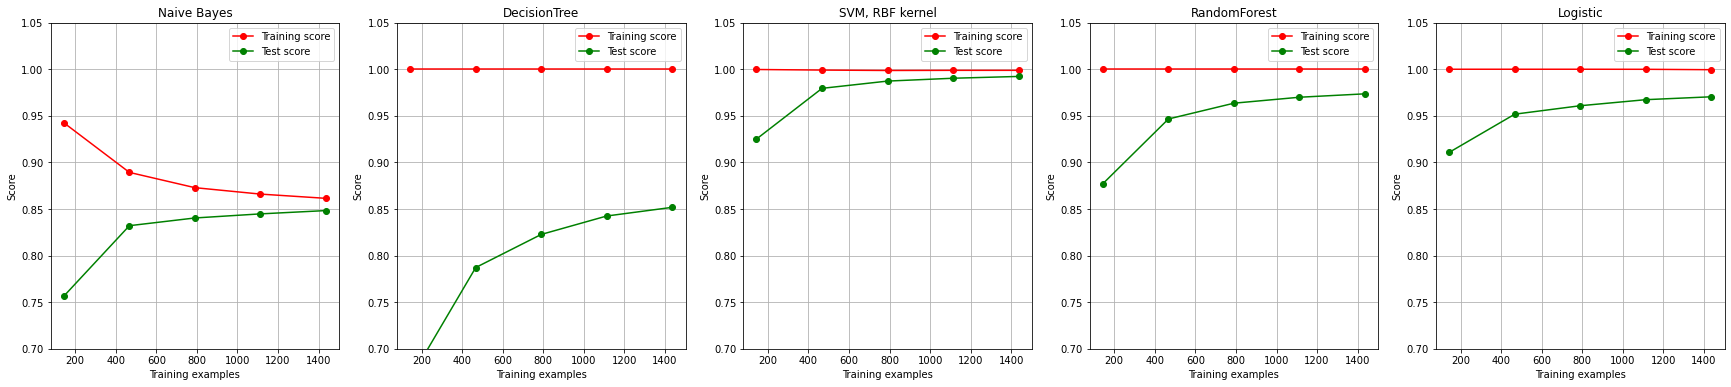

In [21]:
fig, axes = plt.subplots(1,5,figsize=(30,6))
for ind,title_,estimator in zip(range(len(title)),title,model): #索引、标题、模型名称
    times = time()
    plot_learning_curve(estimator, title_, X, y, ax=axes[ind], ylim = [0.7, 1.05],n_jobs=4, cv=cv)
    print("{}:{}".format(title_,datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))
plt.show()

**各个算法的运行时间**：决策树和贝叶斯不相伯仲(如果你没有发现这个结果，那么可以多运行几次，你会发现贝叶斯和决策树的运行时间逐渐变得差不多)。决策树之所以能够运行非常快速是因为sklearn中的分类树在选择特征时有所"偷懒”，没有计算全部特征的信息嫡而是随机选择了一部分特征来进行计算，因此速度快可以理解，但我们知道决策树的运算效率随着样本量逐渐增大会越来越慢，但朴素贝叶斯却可以在很少的样本上获得不错的结果，因此可以预料，随着样本量的逐渐增大贝叶斯会逐渐变得比决策树更快。朴素贝叶斯计算速度远远胜过SVM和随机森林这样复杂的模型，逻辑回归的运行受到最大迭代次数的强烈影响和输入数据的影响(逻辑回归一般在线性数据上运行都比较快，但在这里应该是受到了**稀疏矩阵**的影响)。因此在运算时间上，朴素贝叶斯还是十分有优势的。

**训练集上的拟合**：手写数字数据集是一个较为简单的数据集，决策树、随机森林、SVC和逻辑回归都成功拟合了100%的准确率，但贝叶斯的最高训练准确率都没有超过95%，这也应证了最开始说的，朴素贝叶斯的分类效果其实不如其他分类器，贝叶斯天生学习能力比较弱。并且注意到，随着训练样本量的逐渐增大，其他模型的训练拟合都保持在100%的水平，但贝叶斯的训练准确率却逐渐下降，这证明样本量越大，贝叶斯需要学习的东西越多，对训练集的拟合程度也越来越差。反而比**较少量的样本**可以让贝叶斯有较高的训练准确率。

**过拟合问题**：首先一眼看到，所有模型在样本量很少的时候都是出于过拟合状态的（训练集上表现好，测试集上表现糟糕），但随着样本的逐渐增多，过拟合问题都逐渐消失了，不过每个模型的处理手段不同。比较强大的分类器，比如SVM、随机森林和逻辑回归，是依靠快速升高模型在测试集上的表现来减轻过拟合问题。相对的，决策树虽然也是通过提高模型在测试集上的表现来减轻过拟合，但随着训练样本的增加，模型在测试集上的表现善生却非常缓慢。朴素贝叶斯独树一帜，是依赖训练集上的准确率下降，测试集上的准确率上升来逐渐解决过拟合问题。

**测试集上的拟合结果**：即泛化误差的大小。随着训练样本数量的上升，所有模型的测试表现都上升了，但贝叶斯和决策树在测试集上的表现远远不如SVM、随机森林和逻辑回归。SVM在训练数据量增大到1500个样本左右的时候，测试集上的表现已经非常接近100%，而随机森林和逻辑回归的表现也在95%以上，而决策树和朴素贝叶斯还徘徊在85%左右。但这两个模型所面临的情况十分不同：决策树虽然测试结果不高，但是却依然具有潜力，因为它的过拟合现象非常严重，可以通过减枝来让决策树的测试结果逼近训练结果。然而贝叶斯的过拟合现象在训练样本达到1500左右的时候已经几乎不存在了，训练集上的分数和测试集上的分数非常接近，只有在非常少的时候测试集上的分数才能够比训练集上的结果更高，所以我们基本可以判断，85%左右就是贝叶斯在这个数据集上的极限了。可以预测到，如果进行调参，那决策树最后应该可以达到90%左右的预测准确率，但贝叶斯却几乎没有潜力了。

在这个对比之下，可以看出：贝叶斯是**速度很快**，但分类**效果一般**，并且初次训练之后的结果就很接近算法极限的算法，几乎**没有调参的余地**。也就是说，如果追求对概率的预测，并且希望越准确越好，那应该先选择**逻辑回归**。如果数据十分复杂或者是稀疏矩阵，就使用**贝叶斯**。如果分类的目标不是要追求对概率的预测，那完全可以先试试看高斯朴素贝叶斯的效果（反正它运算很快速，还不需要太多的样本)，如果效果很不错，就很幸运地得到了一个表现优秀又快速的模型。如果没有得到比较好的结果，那完全可以选择再更换成更加复杂的模型。

## 二、概率类模型的评估指标

**混淆矩阵**和**精确性**可以帮助我们了解贝叶斯的分类结果。然而，我们选择贝叶斯进行分类，大多数时候都不是为了单单追求效果，而是希望看到**预测的相关概率**。这种概率给出预测的可信度，所以对于概率类模型，我们希望能够由**其他的模型评估指标**来帮助我们判断模型在“概率预测”这项工作上，完成得如何。

### （一）布里尔分数Brier Score

**概率预测**相对于**测试样本**的**均方误差**，只能用于**二分类**，表示为：$$Brier Score = \frac{1}{N}\sum_{i=1}^{N}(p_i-o_i)^2$$其中N是样本数量， 为朴素贝叶斯预测出的概率， 是样本所对应的真实结果，只能取到0或者1，如果事件发生则为1，如果不发生则为0。这个指标衡量了**概率**距离**真实标签结果**的差异，布里尔分数的范围是从0到1，分数越高则预测结果越差劲，校准程度越差，因此**布里尔分数越接近0越好**。

In [22]:
from sklearn.metrics import brier_score_loss

**1.贝叶斯**

In [23]:
pd.DataFrame(prob)

,0,1,2,3,4,5,6,7,8,9
0,0.000000e+00,4.693917e-52,1.748713e-98,1.256560e-102,0.000000e+00,7.699211e-50,1.000000e+00,0.000000e+00,4.195890e-33,1.517515e-119
1,0.000000e+00,1.000000e+00,9.267425e-13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,3.736082e-26,1.000000e+00,0.000000e+00,2.815022e-20,0.000000e+00,0.000000e+00,1.295418e-39,5.546849e-77
3,1.000000e+00,4.856319e-65,4.428965e-155,1.900709e-167,1.039442e-154,7.407044e-60,0.000000e+00,0.000000e+00,7.390032e-114,4.322875e-99
4,0.000000e+00,1.081168e-48,4.026991e-228,0.000000e+00,1.000000e+00,2.885477e-59,0.000000e+00,1.588477e-40,4.942548e-93,4.560450e-139
...,...,...,...,...,...,...,...,...,...,...
535,0.000000e+00,8.903971e-12,1.974485e-207,8.863591e-192,1.000000e+00,3.598602e-38,3.973065e-15,4.568908e-25,3.649153e-62,3.235736e-179
536,4.893174e-233,1.476313e-134,9.527206e-71,1.000131e-27,0.000000e+00,1.604598e-39,0.000000e+00,0.000000e+00,6.284253e-78,1.000000e+00
537,0.000000e+00,2.433150e-47,4.824837e-305,8.339990e-295,1.000000e+00,2.697838e-66,1.863007e-82,2.316127e-08,1.238916e-126,2.878961e-257
538,0.000000e+00,8.264629e-129,4.991506e-12,9.959820e-01,0.000000e+00,2.687307e-25,0.000000e+00,0.000000e+00,4.018024e-03,6.190007e-13


In [24]:
prob.shape

(540, 10)

In [25]:
pd.DataFrame(Ytest)

,0
0,6
1,1
2,3
3,0
4,4
...,...
535,4
536,9
537,4
538,3


In [26]:
Ytest.shape

(540,)

In [27]:
np.unique(Ytest)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
Ytest_= Ytest.copy()
Ytest_ = pd.get_dummies(Ytest_) #哑变量处理
Ytest_

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
535,0,0,0,0,1,0,0,0,0,0
536,0,0,0,0,0,0,0,0,0,1
537,0,0,0,0,1,0,0,0,0,0
538,0,0,0,1,0,0,0,0,0,0


In [29]:
Ytest_.shape

(540, 10)

In [30]:
#参数：真实标签，预测出的概率值，正样本的标签
for i in np.unique(Ytest):
    print('标签:',i,'贝叶斯布里尔分数:',brier_score_loss(Ytest_.iloc[:,i],prob[:,i], pos_label=1))

标签: 0 贝叶斯布里尔分数: 0.003680512744365077
标签: 1 贝叶斯布里尔分数: 0.032619662406118764
标签: 2 贝叶斯布里尔分数: 0.04073796355303327
标签: 3 贝叶斯布里尔分数: 0.024227451061575995
标签: 4 贝叶斯布里尔分数: 0.013717124391784064
标签: 5 贝叶斯布里尔分数: 0.012770720966518715
标签: 6 贝叶斯布里尔分数: 0.008906952589951798
标签: 7 贝叶斯布里尔分数: 0.028006698663252037
标签: 8 贝叶斯布里尔分数: 0.0680707157691044
标签: 9 贝叶斯布里尔分数: 0.031524759298859326


**2.支持向量机**

In [31]:
from sklearn.svm import SVC
svc = SVC(kernel = "linear",gamma=1).fit(Xtrain,Ytrain)

#由于SVC的置信度并不是概率，为了可比性，需要将SVC的置信度“距离”归一化，压缩到[0,1]之间
svc_prob = (svc.decision_function(Xtest) -svc.decision_function(Xtest).min())/(svc.decision_function(Xtest).max() - svc.decision_function(Xtest).min())
for i in np.unique(Ytest):
    print('标签:',i,'支持向量机布里尔分数:',brier_score_loss(pd.get_dummies(Ytest).iloc[:,i],svc_prob[:,i],pos_label=1))

标签: 0 支持向量机布里尔分数: 0.09728462912221948
标签: 1 支持向量机布里尔分数: 0.24286480465579566
标签: 2 支持向量机布里尔分数: 0.15137462694728818
标签: 3 支持向量机布里尔分数: 0.35964547131445845
标签: 4 支持向量机布里尔分数: 0.16936889882184517
标签: 5 支持向量机布里尔分数: 0.2374537033722683
标签: 6 支持向量机布里尔分数: 0.18216570769044446
标签: 7 支持向量机布里尔分数: 0.18871755658838568
标签: 8 支持向量机布里尔分数: 0.5288453376386748
标签: 9 支持向量机布里尔分数: 0.2953354755915219


**3.逻辑回归**

In [32]:
from sklearn.linear_model import LogisticRegression as LR
logi = LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto").fit(Xtrain,Ytrain)
for i in np.unique(Ytest):
    print('标签:',i,'逻辑回归布里尔分数:',brier_score_loss(pd.get_dummies(Ytest).iloc[:,i],logi.predict_proba(Xtest)[:,i],pos_label=1))

标签: 0 逻辑回归布里尔分数: 9.314894681923091e-06
标签: 1 逻辑回归布里尔分数: 0.011437043229679316
标签: 2 逻辑回归布里尔分数: 0.0026701867428804726
标签: 3 逻辑回归布里尔分数: 0.00572211674415965
标签: 4 逻辑回归布里尔分数: 0.0016888866852596504
标签: 5 逻辑回归布里尔分数: 0.004233496778069939
标签: 6 逻辑回归布里尔分数: 0.0009091890014438482
标签: 7 逻辑回归布里尔分数: 0.0017552818342740034
标签: 8 逻辑回归布里尔分数: 0.010042788358468705
标签: 9 逻辑回归布里尔分数: 0.008694929201604366


**4.将每个分类器每个标签类别下的布里尔分数可视化：**

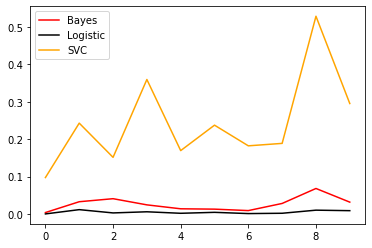

In [33]:
name = ["Bayes","Logistic","SVC"]
color = ["red","black","orange"]

df = pd.DataFrame(index=range(10),columns=name)
for i in range(10):
    df.loc[i,name[0]] = brier_score_loss(pd.get_dummies(Ytest).iloc[:,i],prob[:,i],pos_label=1)
    df.loc[i,name[1]] = brier_score_loss(pd.get_dummies(Ytest).iloc[:,i],logi.predict_proba(Xtest)[:,i],pos_label=1)
    df.loc[i,name[2]] = brier_score_loss(pd.get_dummies(Ytest).iloc[:,i],svc_prob[:,i],pos_label=1)
for i in range(df.shape[1]):
    plt.plot(range(10),df.iloc[:,i],c=color[i])
plt.legend(name)
plt.show()

可以观察到，**逻辑回归**的布里尔分数有着压倒性优势，**SVC**的效果明显弱于贝叶斯和逻辑回归（如同我们之前在sVC的讲解中说明过的一样，SVC是强行利用sigmoid函数来压缩概率，因此SVC产出的概率结果并不那么可靠）。**贝叶斯**位于逻辑回归和SVC之间，效果也不错，但比起逻辑回归，还是不够精确和稳定。

### （二）对数似然函数Log Loss

由于是损失，因此对数似然函数的取值越**小**，则证明概率估计越准确，模型越理想。与逻辑回归的损失函数一模一样。可用于**多分类**。

In [34]:
from sklearn.metrics import log_loss

In [35]:
#参数：真实标签y_true，预测的概率y_pred，标签取值labels（可不输入，因为是多分类）
print('贝叶斯对数似然函数：',log_loss(Ytest,prob))
print('逻辑回归对数似然函数：',log_loss(Ytest,logi.predict_proba(Xtest)))
print('支持向量机对数似然函数：',log_loss(Ytest,svc_prob))

贝叶斯对数似然函数： 2.4725653911460683
逻辑回归对数似然函数： 0.12750516097732748
支持向量机对数似然函数： 1.6074987533411256


注意到，用**log_loss**得出的结论和使用**布里尔分数**得出的结论不一致：当使用布里尔分数作为评判标准的时候，SVC的估计效果是最差的，逻辑回归和贝叶斯的结果相接近。而使用对数似然的时候，虽然依然是逻辑回归最强大，但贝叶斯却没有SVC的效果好。<br>
因为逻辑回归和SVC都是以**最优化**为目的来求解模型，然后进行分类的算法。而朴素贝叶斯中，却没有最优化的过程。对数似然函数直接指向模型最优化的方向，甚至就是**逻辑回归的损失函数本身**，因此在逻辑回归和SVC上表现得更好。

在现实应用中，**对数似然函数**是概率类模型评估的黄金指标，往往是评估概率类模型的优先选择。但是它也有一些缺点，首先它**没有界**，不像布里尔分数有上限，可以作为模型效果的参考。其次，它的**解释性**不如布里尔分数，很难与非技术人员去交流对数似然存在的可靠性和必要性。第三，它在以**最优化**为目标的模型上明显表现更好。而且，它还有—些数学上的问题，比如**不能接受为0或1的概率**，否则的话对数似然就会取到极限值（考虑以e为底的自然对数在取到0或1的时候的情况)。所以因此通常来说，有以下使用规则：

需求|优先使用对数似然|优先使用布里尔分数
-|-|-
衡量模型|要对比多个模型，或者衡量模型的不同变化|衡量单一模型的表现
可解释性|机器学习和深度学习之间的行家交流，学术论文|商业报告，老板开会，业务模型的衡量
最优化指向|逻辑回归，SVC|朴素贝叶斯
数学问题|概率只能无限接近于0或1，无法取到0或1|概率可以取到0或1，比如树、随机森林

回到贝叶斯来看，如果贝叶斯的模型效果不如其他模型，而又不想更换模型，那怎么办呢？如果以**精确度**为指标来调整参数，贝叶斯估计是无法拯救了——不同于SVC和逻辑回归，贝叶斯的原理简单，根本没有什么可用的参数。但是产出概率的算法有自己的调节方式，就是调节**概率的校准程度**。校准程度越高，模型对概率的预测越准确，算法在做判断时就越有自信，模型就会更稳定。如果追求模型在概率预测上必须尽量贴近真实概率，那就可以使用**可靠性曲线**来调节概率的校准程度。

### （三）可靠性曲线Reliability Curve

可靠性曲线（reliability curve），又叫做概率校准曲线（probability calibration curve），可靠性图（reliability
diagrams），这是一条以**预测概率**为横坐标，**真实标签**为纵坐标的曲线。我们希望预测概率和真实值越接近越好，最好两者相等，因此一个模型/算法的概率校准曲线越**靠近对角线**越好。和布里尔分数相似，概率校准曲线是对于**标签的某一类**来说的，因此一类标签就会有一条曲线，或者可以使用一个**多类标签下的平均**来表示一整个模型的概率校准曲线。但通常来说，曲线用于二分类的情况最多。

**1.导入需要的库和模块**

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification as mc #用于创建数据集
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import brier_score_loss #布里尔分数
from sklearn.model_selection import train_test_split

**2.创建数据集**

In [37]:
X, y = mc(n_samples = 10000, #样本量
          n_features = 20, #20个特征
          n_classes = 2, #标签2分类
          n_informative = 2, #信息比较多的有2个特征
          n_redundant = 10, #冗余特征有10个
          random_state = 42 #随机数种子
          )

In [38]:
X.shape

(10000, 20)

In [39]:
np.unique(y)

array([0, 1])

In [40]:
#样本量足够大，因此使用1%的样本作为训练集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.99,random_state=42)

In [41]:
Xtrain.shape

(100, 20)

In [42]:
np.unique(Ytrain)

array([0, 1])

**3.建立模型，绘制图像**

In [43]:
gnb = GaussianNB()
gnb.fit(Xtrain,Ytrain)
y_pred = gnb.predict(Xtest)
clf_score = gnb.score(Xtest,Ytest)
prob_pos = gnb.predict_proba(Xtest)[:,1] #预测概率-横坐标
#Ytest：真实标签-纵坐标

In [44]:
#利用字典创建DataFrame({'列的名称':[列的值]})
df = pd.DataFrame({'ytrue':Ytest[:500],'probability':prob_pos[:500]})
df.head()

,ytrue,probability
0,0,3.034442e-07
1,0,2.574361e-08
2,0,9.995630e-01
3,1,1.000000e+00
4,0,4.029748e-04


In [45]:
df = df.sort_values(by='probability')
df.head()

,ytrue,probability
35,0,4.886977e-22
400,0,4.303943e-20
204,0,2.598936e-19
363,0,2.668146e-19
36,0,4.027375e-17


In [46]:
df.index = range(df.shape[0])
df.head()

,ytrue,probability
0,0,4.886977e-22
1,0,4.303943e-20
2,0,2.598936e-19
3,0,2.668146e-19
4,0,4.027375e-17


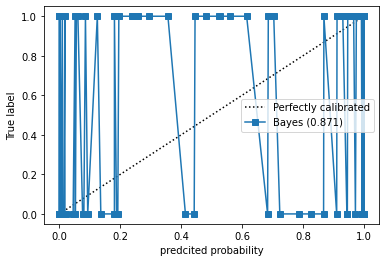

In [47]:
fig = plt.figure() #建立画布
ax1 = plt.subplot() #建立子图ax1
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated") #绘制一条对角线来对比
ax1.plot(df["probability"], #横坐标
         df["ytrue"], #纵坐标
         "s-", #每个样本点用方块表示，样本点之间用线连接
         label="%s (%1.3f)" % ("Bayes", clf_score)) #准确率
ax1.set_ylabel("True label")
ax1.set_xlabel("predcited probability")
ax1.set_ylim([-0.05, 1.05]) #稍微拓宽y轴范围
ax1.legend()
plt.show()

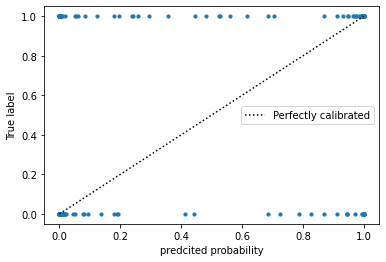

In [48]:
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0,1],[0,1],"k:",label="Perfectly calibrated")
ax1.scatter(df["probability"],df["ytrue"],s=10)
ax1.set_ylabel ("True label")
ax1.set_xlabel ("predcited probability")
ax1.set_ylim([-0.05,1.05])
ax1.legend()
plt.show()

可以看到，由于真实标签是0和1，所以所有的点都在y=1和y=0这两条直线上分布，这完全不是我们希望看到的图像。回想一下可靠性曲线的横纵坐标：横坐标是预测概率，而纵坐标是真实值，我们希望预测概率很靠近真实值，那我们的真实取值必然也需要是一个**概率**才可以，如果使用真实标签，那我们绘制出来的图像完全是没有意义的。然而真实概率在现实中是不可获得的。但是，我们可以获得**类概率的指标**来帮助我们进行校准。一个简单的做法是，将数据进行**分箱**，然后规定每个箱子中**真实的少数类所占的比例**为这个箱上的真实概率trueproba，这个箱子中**预测概率的均值**为这个箱子的预测概率predproba，然后以trueproba为纵坐标，predproba为横坐标，来绘制可靠性曲线。

**4.使用可靠性曲线的类在贝叶斯上绘制一条校准曲线**

In [49]:
from sklearn.calibration import calibration_curve

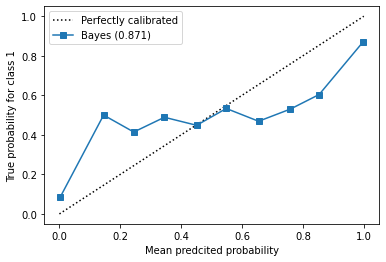

In [50]:
#纵坐标，横纵表
trueproba, predproba = calibration_curve(Ytest,prob_pos,n_bins=10) #真实标签，预测概率，希望分箱的个数

fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % ("Bayes", clf_score))
ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

**5.不同的n_bins取值下曲线如何改变？**

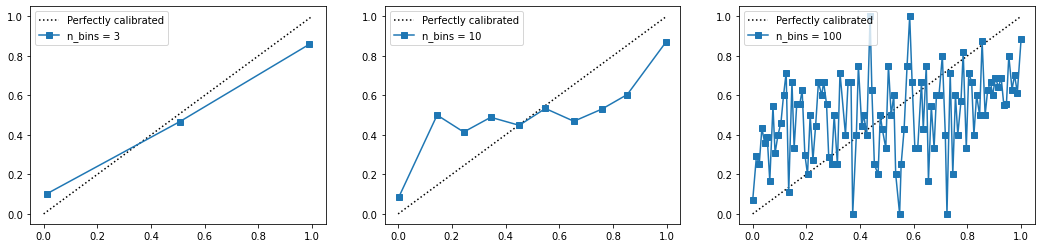

In [51]:
fig, axes = plt.subplots(1,3,figsize=(18,4))
for ind,i in enumerate([3,10,100]):
    ax = axes[ind]
    ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=i)
    ax.plot(predproba, trueproba,"s-",label="n_bins = {}".format(i))
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean predcited probability")
    ax1.set_ylim([-0.05, 1.05])
    ax.legend()
plt.show()

可以看出，n_bins越大，箱子越多，概率校准曲线就越精确，但是太过精确的曲线不够平滑，无法和我们希望的完美概率密度曲线相比较。n_bins越小，箱子越少，概率校准曲线就越粗糙，虽然靠近完美概率密度曲线，但是无法真实地展现模型概率预测地结果。因此需要取一个既不是太大、也不是太小的箱子个数，让概率校准曲线既不是太精确，也不是太粗糙，而是一条相对平滑，又可以反应出模型对概率预测的趋势的曲线。通常来说，建议先试试看箱子数等于10的情况。箱子的数目越大，所需要的样本量也越多，否则曲线就会太过精确。

**6.建立更多模型**

In [52]:
name = ["GaussianBayes","Logistic","SVC"]
gnb = GaussianNB() #返回概率
logi = LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto") #返回概率
svc = SVC(kernel = "linear",gamma=1) #返回置信度

**7.建立循环，绘制多个模型的概率校准曲线**

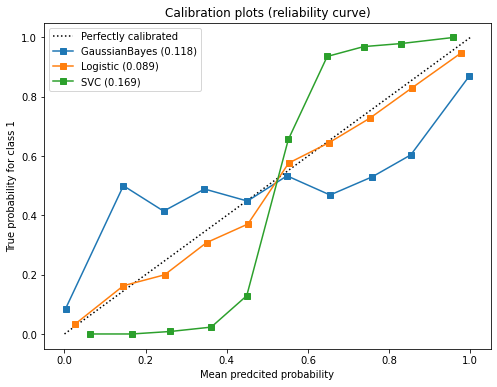

In [53]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name_ in zip([gnb,logi,svc],name):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:,1]
    else: #use decision function
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    #返回布里尔分数
    clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
    trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=10)
    ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % (name_, clf_score))
ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
ax1.set_title('Calibration plots (reliability curve)')
plt.show()

从图像的结果来看，可以看出，**逻辑回归**的概率估计是最接近完美的概率校准曲线，所以逻辑回归的效果最完美。相对的，高斯朴素贝叶斯和支持向量机分类器的结果都比较糟糕。支持向量机呈现类似于sigmoid函数的形状，而高斯朴素贝叶斯呈现和Sigmoid函数相反的形状。<br>
对于贝叶斯，如果概率校准曲线呈现sigmoid函数的镜像的情况，则说明数据集中的特征**不是相互条件独立**的。贝叶斯原理中的"朴素"原则：特征相互条件独立原则被违反了(这其实是我们自己的设定，我们设定了10个冗余特征，这些特征就是噪音，他们之间不可能完全独立)，因此贝叶斯的表现不够好。<br>
而支持向量机的概率校准曲线效果其实是典型的**置信度不足**的分类器(under-confident classifier)的表现：大量的样本点集中在决策边界的附近，因此许多样本点的置信度靠近0.5左右，即便决策边界能够将样本点判新正确，模型本身对这个结果也不是非常确信的。相对的，离决策边界很远的点的置信度就会很高，因为它很大可能性上不会被判断错误。支持向量机在面对混合度较高的数据的时候，有着天生的置信度不足的缺点。<br>

### （四）预测概率的直方图

直方图是以样本的**预测概率分箱后的结果**为横坐标，**每个箱中的样本数量**为纵坐标的一个图像。注意，这里的分箱和在可靠性曲线中的分箱不同，这里的分箱是将预测概率**均匀**分为一个个的区间，与之前可靠性曲线中为了平滑的分箱完全是两码事。

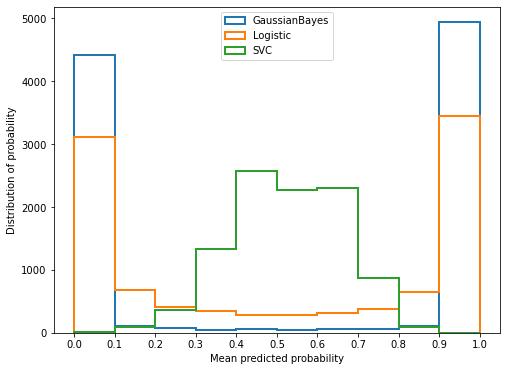

In [54]:
fig, ax2 = plt.subplots(figsize=(8,6))

for clf, name_ in zip([gnb,logi,svc],name):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:,1]
    else: #use decision function
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    ax2.hist(prob_pos #预测概率-横坐标
            ,bins=10
            ,label=name_
            ,histtype="step" #设置直方图为透明
            ,lw=2 #设置直方图每个柱子描边的粗细
            )

ax2.set_ylabel("Distribution of probability")
ax2.set_xlabel("Mean predicted probability")
ax2.set_xlim([-0.05, 1.05])
ax2.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax2.legend(loc=9)
plt.show()

可以看到，**高斯朴素贝叶斯**的概率分布两边非常高、中间非常低，几乎90%以上的样本都在0和1的附近，可以说是**置信度最高**的算法，但是贝叶斯的布里尔分数却不如逻辑回归，这证明贝叶斯中在0和1附近的样本中有一部分是被分错的。**支持向量机**与贝叶斯完全相反，明显是中间高、两边低，类似于正态分布的状况，证明了刚才说的，大部分样本都在决策边界附近，置信度都徘徊在0.5左右的情况。而**逻辑回归**位于高斯朴素贝叶斯和支持向量机的中间，即没有太多的样本过度靠近0和1，也没有形成像支持向量机那样的正态分布。一个比较健康的正样本的概率分布，就是逻辑回归的直方图显示出来的样子。

### （五）校准可靠性曲线

使用sklearn中的概率校正类CalibratedClassifierCV来对二分类情况下的数据集进行概率校正。

`sklearn.calibration.CalibratedClassifierCV`(base_estimator=None, method='sigmoid', cv='warn')

这是一个带**交叉验证**的概率校准类，它使用交叉验证生成器，对交叉验证中的每一份数据，它都在训练样本上进行模型参数估计，在测试样本上进行概率校准，然后为我们返回最佳的一组参数估计和校准结果。每一份数据的预测概率会被求解**平均**。注意，类CalibratedClassifierCV没有接口decision_function，要查看这个类下校准过后的模型生成的概率，必须调用predict_proba接口。

**base_estimator**：<br>
需要校准的分类器(clf)，必须存在predict_proba或decision_function接口。如果参数cv = prefit，分类器必须已经拟合数据完毕。

**cv**：整数，确定交叉验证的策略。可能输入是：<br>
* None，表示使用默认的3折交叉验证<br>
* 任意整数，指定折数<br>
* 对于输入整数和None的情况下来说，如果是**二分类**，则自动使用类sklearn.model_selection.StratifiedKFold进行折数分割。如果y是**连续型变量**，则使用sklearn.model_selection.KFold进行分割。<br>
* 已经使用其他类建好的交叉验证模式或生成器cv<br>
* 可迭代的，已经分割完毕的测试集和训练集索引数组<br>
* 输入"prefit"，则假设已经在分类器上拟合完毕数据。在这种模式下，使用者必须手动确定用来拟合分类器的数据与即将倍校准的数据没有交集<br>

**method**：进行概率校准的方法，可输入"sigmoid"或者"isotonic"<br>
* 输入'sigmoid'，使用基于Platt的Sigmoid模型来进行校准
* 输入'isotonic'，使用等渗回归来进行校准
当校准的样本量太少(比如，小于等于1000个测试样本)的时候，不建议使用等渗回归，因为它倾向于过拟合。样本量过少时使用sigmoids，即Platt校准。

**1.包装函数**

将之前绘制可靠性曲线和直方图的代码包装成函数。考虑函数的参数为：模型、模型的名字、数据和需要分箱的个数。在这里将直方图和可靠性曲线打包在同一个函数中，让他们并排显示。

In [55]:
def plot_calib(models,name,Xtrain,Xtest,Ytrain,Ytest,n_bins=10):
    import matplotlib.pyplot as plt
    from sklearn.metrics import brier_score_loss
    from sklearn.calibration import calibration_curve
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name_ in zip(models,name):
        clf.fit(Xtrain,Ytrain)
        y_pred = clf.predict(Xtest)
        #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(Xtest)[:,1]
        else: # use decision function
            prob_pos = clf.decision_function(Xtest)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        #返回布里尔分数
        clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
        trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=n_bins)
        ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % (name_, clf_score))
        ax2.hist(prob_pos, range=(0, 1), bins=n_bins, label=name_,histtype="step",lw=2)
    
    ax2.set_ylabel("Distribution of probability")
    ax2.set_xlabel("Mean predicted probability")
    ax2.set_xlim([-0.05, 1.05])
    ax2.legend(loc=9)
    ax2.set_title("Distribution of probablity")
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean predcited probability")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend()
    ax1.set_title('Calibration plots(reliability curve)')
    plt.show()

**2.设实例化模型，设定模型的名字**

In [56]:
from sklearn.calibration import CalibratedClassifierCV
name = ["GaussianBayes","Logistic","Bayes+isotonic","Bayes+sigmoid"]
gnb = GaussianNB()
models = [gnb
         ,LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto")
         #定义两种校准方式
         ,CalibratedClassifierCV(gnb, cv=2, method='isotonic')
         ,CalibratedClassifierCV(gnb, cv=2, method='sigmoid')]

**3.基于函数进行绘图**

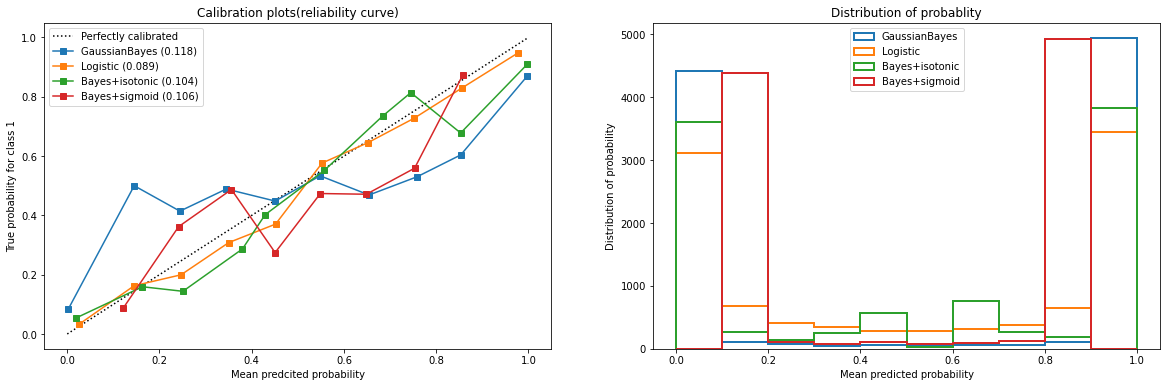

In [57]:
plot_calib(models,name,Xtrain,Xtest,Ytrain,Ytest)

从校正朴素贝叶斯的结果来看，Isotonic等渗校正大大改善了曲线的形状，几乎让贝叶斯的效果与逻辑回归持平，并且布里尔分数也下降到了0.098，比逻辑回归还低一个点。Sigmoid校准的方式也对曲线进行了稍稍的改善，不过效果不明显。从直方图来看，Isotonic校正让高斯朴素贝叶斯的效果接近逻辑回归，而Sigmoid校正后的结果依然和原本的高斯朴素贝叶斯更相近。可见，当数据的特征之间不是相互条件独立的时候，使用Isotonic方式来校准概率曲线，可以得到不错的结果，让模型在预测上更加谦虚。

**4.基于校准结果查看精确性的变化**

In [58]:
gnb = GaussianNB().fit(Xtrain,Ytrain)
gnb.score(Xtest,Ytest) #不调节的准确度

0.8712121212121212

In [59]:
brier_score_loss(Ytest,gnb.predict_proba(Xtest)[:,1],pos_label = 1) #不调节的布里尔分数

0.11807798765818385

In [60]:
gnbisotonic = CalibratedClassifierCV(gnb, cv=2, method='isotonic').fit(Xtrain,Ytrain)
gnbisotonic.score(Xtest,Ytest) #等渗回归调节后的准确度

0.8753535353535353

In [61]:
brier_score_loss(Ytest,gnbisotonic.predict_proba(Xtest)[:,1],pos_label = 1) #等渗回归调节后的布里尔分数

0.10365778849527331

可以看出，校准概率后，**布里尔分数变小**了，但整体的**准确率却略有下降**，这证明算法在校准之后，尽管对概率的预测更准确了，但模型的判断力略有降低。来思考一下：布里尔分数衡量模型概率预测的准确率，布里尔分数越低，代表模型的概率越接近真实概率，当进行概率校准后，本来标签是1的样本的概率应该会更接近1，而标签本来是0的样本应该会更接近0，没有理由布里尔分数提升了，模型的判断准确率居然下降了。但从结果来看，模型的准确率和概率预测的正确性并不是完全一致的，为什么会这样呢？<br>
对于不同的概率类模型，原因是不同的。对于**SVC**和**决策树**这样的模型来说，概率不是真正的概率，而更偏向于是一个“置信度”，这些模型也不是依赖于概率预测来进行分类（决策树依赖于树杈而SVC依赖于决策边界），因此对于这些模型，可能存在着类别1下的概率为0.4但样本依然被分类为1的情况，这种情况代表着——模型很没有信心认为这个样本是1，但是还是坚持把这个样本的标签分类为1了。这种时候，概率校准可能会向着更加错误的方向调整（比如把概率为0.4的点调节得更接近0，导致模型最终判断错误），因此出现布里尔分数可能会显示和精确性相反的趋势。<br>
而对于**朴素贝叶斯**这样的模型，却是另一种情况。注意在朴素贝叶斯中，有各种各样的假设，除了我们的“朴素”假设，还有我们对概率分布的假设（比如说高斯），这些假设使得我们的贝叶斯得出的概率估计其实是有偏估计，也就是说，这种概率估计其实不是那么准确和严肃。通过校准，让模型的预测概率更贴近于真实概率，本质是在统计学上让算法更加贴近对整体样本状况的估计，这样的一种校准在一组数据集上可能表现出让准确率上升，也可能表现出让准确率下降，这取决于测试集有多贴近估计的真实样本的面貌。这一系列有偏估计使得在概率校准中可能出现布里尔分数和准确度的趋势相反的情况。<br>
当然，可能还有更多更深层的原因，比如概率校准过程中的数学细节如何影响了我们的校准，类calibration_curve中是如何分箱，如何通过真实标签和预测值来生成校准曲线使用的横纵坐标的，这些过程中也可能有着让布里尔分数和准确率向两个方向移动的过程。<br>
在现实中，当两者相悖的时候，请务必以**准确率**为标准。但是这不代表说布里尔分数和概率校准曲线就无效了。概率类模型几乎没有参数可以调整，除了换模型之外，鲜有更好的方式帮助我们提升模型的表现，概率校准是难得的可以帮助我们针对概率提升模型的方法。

**5.试试看对于SVC，哪种校准更有效呢？**

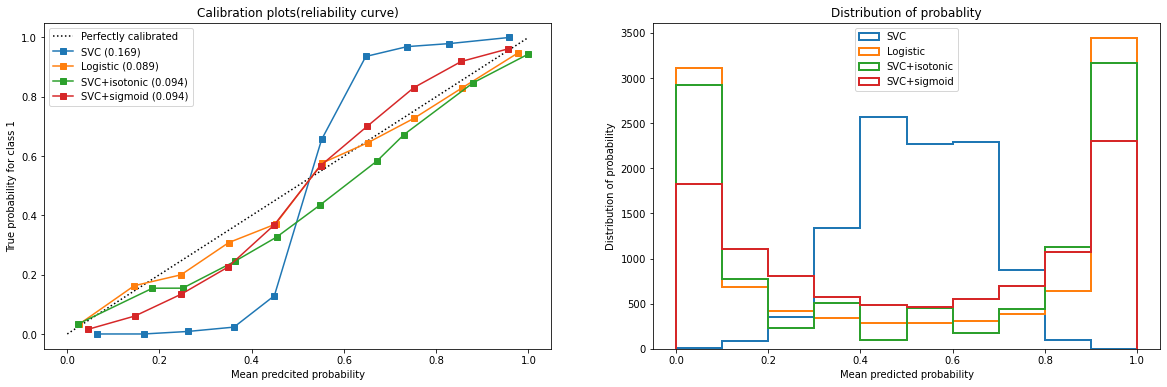

In [62]:
name_svc = ["SVC","Logistic","SVC+isotonic","SVC+sigmoid"]
svc = SVC(kernel = "linear",gamma=1)
models_svc = [svc
             ,LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto")
             #依然定义两种校准方式
             ,CalibratedClassifierCV(svc, cv=2, method='isotonic')
             ,CalibratedClassifierCV(svc, cv=2, method='sigmoid')]
plot_calib(models_svc,name_svc,Xtrain,Xtest,Ytrain,Ytest)

In [63]:
name_svc = ["SVC","SVC+isotonic","SVC+sigmoid"]
svc = SVC(kernel = "linear",gamma=1)
models_svc = [svc
             ,CalibratedClassifierCV(svc, cv=2, method='isotonic')
             ,CalibratedClassifierCV(svc, cv=2, method='sigmoid')]
for clf, name in zip(models_svc,name_svc):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:, 1]
    else:
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
    score = clf.score(Xtest,Ytest)
    print("{}:".format(name))
    print("\tBrier:{:.4f}".format(clf_score))
    print("\tAccuracy:{:.4f}".format(score))

SVC:
	Brier:0.1693
	Accuracy:0.8742
SVC+isotonic:
	Brier:0.0944
	Accuracy:0.8756
SVC+sigmoid:
	Brier:0.0943
	Accuracy:0.8813


可以看到，对于SVC来说，两种校正都**改善**了准确率和布里尔分数。可见，概率校正对于SVC非常有效。这也说明，概率校正对于原本的可靠性曲线是形容sigmoid形状的曲线的算法比较有效。<br>
在现实中，可以选择调节模型的方向，不一定要追求最高的准确率或者追求概率拟合最好，可以根据自己的需求来调整模型。当然，对于概率类模型来说，由于可以调节的参数甚少，所以更倾向于追求概率拟合，并使用概率校准的方式来调节模型。如果的确希望追求更高的准确率和Recall，可以考虑使用天生就非常准确的概率类模型逻辑回归，也可以考虑使用除了概率校准之外还有很多其他参数可调的支持向量机分类器。